In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
companies = ['AAPL' , 'MSFT'  , 'DELL' , 'GOOG']
end_time = datetime.datetime.now()
start_time = datetime.datetime(end_time.year-24, end_time.month, end_time.day)

for stock in companies:
    globals()[stock] = yf.download(stock, start_time, end_time)
    
company_list = [AAPL, GOOG, MSFT,  DELL]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "DELL"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-12-23,39.200001,39.279999,38.630001,39.119999,39.119999,1466400,DELL
2022-12-27,39.220001,39.590000,38.930000,39.410000,39.410000,1832500,DELL
2022-12-28,39.380001,39.500000,38.599998,38.759998,38.759998,1822900,DELL
2022-12-29,39.110001,39.919998,39.000000,39.820000,39.820000,1582800,DELL
2022-12-30,39.490002,40.220001,39.380001,40.220001,40.220001,1581900,DELL
2023-01-03,40.560001,40.980000,39.970001,40.900002,40.900002,2679200,DELL
2023-01-04,41.389999,41.599998,40.580002,40.939999,40.939999,2790000,DELL
2023-01-05,40.750000,41.099998,40.279999,40.869999,40.869999,2483700,DELL
2023-01-06,41.169998,42.590000,40.820000,42.419998,42.419998,3179700,DELL


In [3]:
df.index

DatetimeIndex(['1999-01-11', '1999-01-12', '1999-01-13', '1999-01-14',
               '1999-01-15', '1999-01-19', '1999-01-20', '1999-01-21',
               '1999-01-22', '1999-01-25',
               ...
               '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09'],
              dtype='datetime64[ns]', name='Date', length=18318, freq=None)

In [4]:
def featuers(df):
    df = df.copy()
    df['Dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    return df

df = featuers(df)
    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18318 entries, 1999-01-11 to 2023-01-09
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          18318 non-null  float64
 1   High          18318 non-null  float64
 2   Low           18318 non-null  float64
 3   Close         18318 non-null  float64
 4   Adj Close     18318 non-null  float64
 5   Volume        18318 non-null  int64  
 6   company_name  18318 non-null  object 
 7   Dayofweek     18318 non-null  int64  
 8   month         18318 non-null  int64  
 9   quarter       18318 non-null  int64  
 10  year          18318 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


In [6]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,company_name,Dayofweek,month,quarter,year
Date,,,,,,,,,,,
1999-01-11,0.408482,0.411272,0.400670,0.409598,0.349149,560974400,APPLE,0,1,1,1999
1999-01-12,0.413504,0.416295,0.393973,0.411830,0.351051,820736000,APPLE,1,1,1,1999
1999-01-13,0.382813,0.422433,0.377232,0.415179,0.353906,1047816000,APPLE,2,1,1,1999
1999-01-14,0.406250,0.410714,0.366629,0.369420,0.314900,1723859200,APPLE,3,1,1,1999
1999-01-15,0.373326,0.376116,0.357143,0.368862,0.314425,1006006400,APPLE,4,1,1,1999


<Figure size 1500x1000 with 0 Axes>

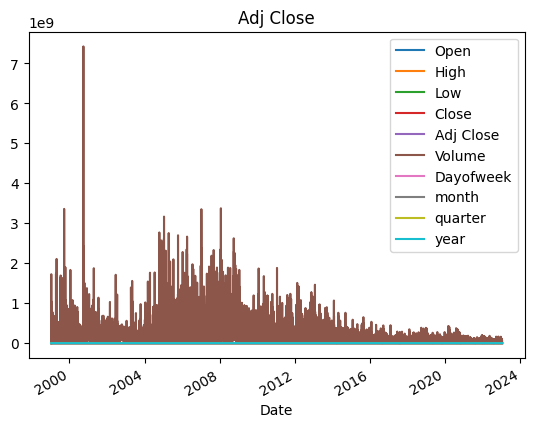

In [7]:
plt.figure(figsize=(15, 10))
df.plot( title = 'Adj Close')
plt.show()

In [8]:
df_train = df.loc[df.index > '2017-1-1']
df_test = df.loc[df.index <= '2017-1-1']

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'Dayofweek', 'month', 'quarter', 'year'],
      dtype='object')

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
ohe = OneHotEncoder()

In [12]:
encode = ohe.fit_transform(df[['company_name']]).toarray()

In [13]:
encode_label = ohe.categories_

In [14]:
print(encode_label)

[array(['APPLE', 'DELL', 'GOOGLE', 'MICROSOFT'], dtype=object)]


In [15]:
list(encode_label)

[array(['APPLE', 'DELL', 'GOOGLE', 'MICROSOFT'], dtype=object)]

In [16]:
featuers = pd.DataFrame(encode , columns = ['Apple' , 'Dell' , 'Google' , 'Microsoft'])

In [17]:
featuers.head()

,Apple,Dell,Google,Microsoft
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [18]:
df = pd.concat([df.reset_index() , featuers], axis = 1)

In [19]:
df.set_index('Date', inplace = True)

In [20]:
df.sample(7)

,Open,High,Low,Close,Adj Close,Volume,company_name,Dayofweek,month,quarter,year,Apple,Dell,Google,Microsoft
Date,,,,,,,,,,,,,,,
2005-06-16,6.830896,6.931519,6.801257,6.910099,6.910099,500364485,GOOGLE,3,6,2,2005,0.0,0.0,1.0,0.0
2005-05-16,25.230000,25.500000,25.190001,25.490000,18.091814,50577300,MICROSOFT,0,5,2,2005,0.0,0.0,0.0,1.0
2004-11-29,1.231250,1.242321,1.203750,1.222143,1.041777,1712916800,APPLE,0,11,4,2004,1.0,0.0,0.0,0.0
2013-02-14,19.420458,19.644867,19.371639,19.621952,19.621952,69672173,GOOGLE,3,2,1,2013,0.0,0.0,1.0,0.0
2015-05-26,33.150002,33.227501,32.279999,32.404999,29.406631,282790400,APPLE,1,5,2,2015,1.0,0.0,0.0,0.0
2018-03-15,57.498001,58.054001,56.727001,57.479000,57.479000,27908000,GOOGLE,3,3,1,2018,0.0,0.0,1.0,0.0
2014-12-15,26.065437,26.083387,25.593233,25.619661,25.619661,56268061,GOOGLE,0,12,4,2014,0.0,0.0,1.0,0.0


In [21]:
df.columns.tolist()[6]

'company_name'

In [22]:
df = df.drop('company_name', axis = 1)

In [23]:
df.columns.tolist()

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Dayofweek',
 'month',
 'quarter',
 'year',
 'Apple',
 'Dell',
 'Google',
 'Microsoft']

In [24]:
df_train = df.loc[df.index < '2017-1-1']
df_test = df.loc[df.index >= '2017-1-1']
FEATUERS = ['Open',
 'High',
 'Low',
 'Adj Close',
 'Volume',
 'Dayofweek',
 'month',
 'quarter',
 'year',
 'Apple',
 'Dell',
 'Google',
 'Microsoft']
TARGET = 'Close'
x_train = df_train[FEATUERS]
y_train = df_train[TARGET]

x_test = df_test[FEATUERS]
y_test = df_test[TARGET]

df_train.to_csv("df_train.csv" , sep = ',')
df_test.to_csv("df_test.csv" , sep = ',')
df.to_csv('df.csv', sep = ',')

In [25]:
x_train.sample(5)

,Open,High,Low,Adj Close,Volume,Dayofweek,month,quarter,year,Apple,Dell,Google,Microsoft
Date,,,,,,,,,,,,,
2006-10-27,12.052325,12.085700,11.768140,11.835637,265150137,4,10,4,2006,0.0,0.0,1.0,0.0
2016-01-19,51.480000,51.680000,50.060001,45.329334,43564500,1,1,1,2016,0.0,0.0,0.0,1.0
2016-06-13,35.825500,36.271999,35.825500,35.917999,25178000,0,6,2,2016,0.0,0.0,1.0,0.0
2013-10-16,17.885357,17.947500,17.829643,15.686074,251101200,2,10,4,2013,1.0,0.0,0.0,0.0
2000-02-07,0.964286,1.020089,0.945871,0.868115,441067200,0,2,1,2000,1.0,0.0,0.0,0.0


In [26]:
y_train.sample(5)

Date
2006-11-27     3.197857
2005-04-11    24.969999
2002-09-09    24.350000
2004-05-06     0.474643
2004-10-11     0.689107
Name: Close, dtype: float64

In [27]:
!pip install xgboost

In [28]:
import xgboost as xgb

In [29]:
reg = xgb.XGBRegressor(n_estimators = 500 , 
                      early_stopping_rounds = 50)
reg.fit(x_train, y_train ,
       eval_set = [(x_train , y_train) , (x_test , y_test)],
       verbose = 100)

[0]	validation_0-rmse:16.74651	validation_1-rmse:104.79534
[100]	validation_0-rmse:0.09291	validation_1-rmse:75.52769
[200]	validation_0-rmse:0.05857	validation_1-rmse:75.51575
[300]	validation_0-rmse:0.04135	validation_1-rmse:75.50990
[390]	validation_0-rmse:0.03180	validation_1-rmse:75.50859


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
fi = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns = ['Featuer Importance'])

In [31]:
fi

,Featuer Importance
Open,0.000036
High,0.757919
Low,0.241436
Adj Close,0.000319
Volume,0.000016
Dayofweek,0.000011
month,0.000014
quarter,0.000000
year,0.000037
Apple,0.000034


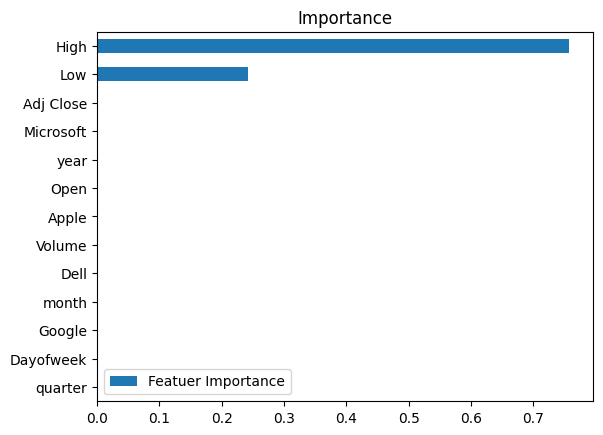

In [32]:
fi.sort_values('Featuer Importance').plot(kind = 'barh' , title = 'Importance')
plt.show()

In [33]:
df_test['predictions'] = reg.predict(x_test)

C:\Users\DEll\AppData\Local\Temp\ipykernel_2372\4012109655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictions'] = reg.predict(x_test)


In [34]:
df_test

,Open,High,Low,Close,Adj Close,Volume,Dayofweek,month,quarter,year,Apple,Dell,Google,Microsoft,predictions
Date,,,,,,,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.174757,115127600,1,1,1,2017,1.0,0.0,0.0,0.0,29.028915
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.144339,84472400,2,1,1,2017,1.0,0.0,0.0,0.0,29.081699
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.282375,88774400,3,1,1,2017,1.0,0.0,0.0,0.0,29.259272
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.586527,127007600,4,1,1,2017,1.0,0.0,0.0,0.0,29.424473
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.839211,134247600,0,1,1,2017,1.0,0.0,0.0,0.0,29.658533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,40.560001,40.980000,39.970001,40.900002,40.900002,2679200,1,1,1,2023,0.0,1.0,0.0,0.0,40.473057
2023-01-04,41.389999,41.599998,40.580002,40.939999,40.939999,2790000,2,1,1,2023,0.0,1.0,0.0,0.0,40.923359
2023-01-05,40.750000,41.099998,40.279999,40.869999,40.869999,2483700,3,1,1,2023,0.0,1.0,0.0,0.0,40.508106


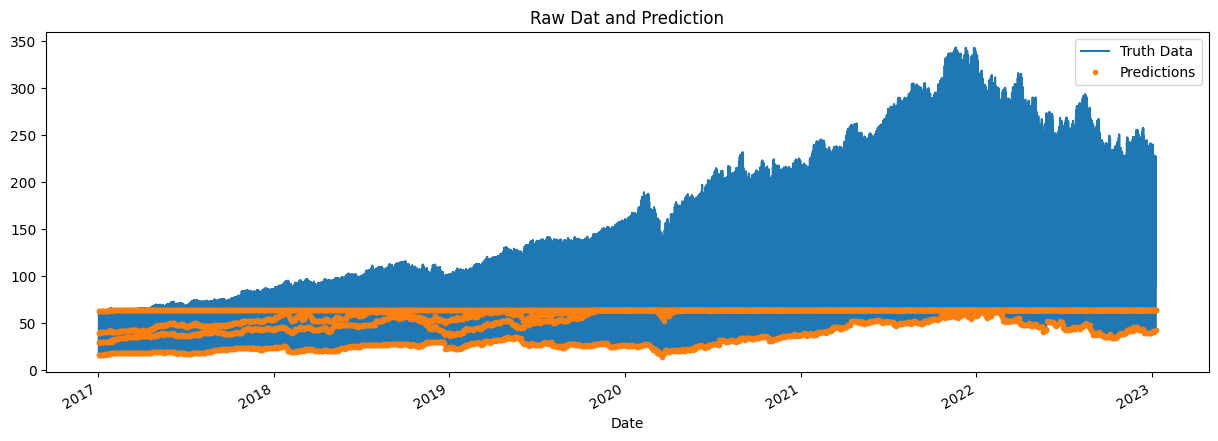

In [35]:
ax = df_test[['Close']].plot(figsize=(15, 5))
df_test['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

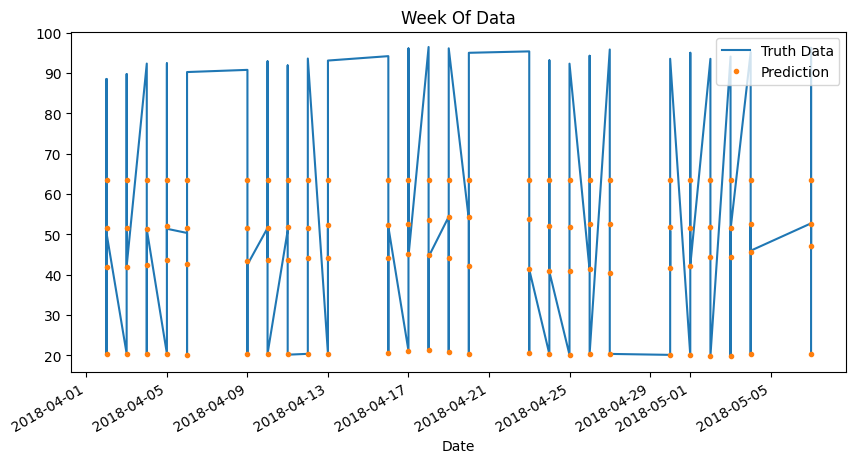

In [36]:
ax = df_test.loc[(df_test.index > '04-01-2018') & (df_test.index < '05-08-2018')]['Close'] \
    .plot(figsize=(10, 5), title='Week Of Data')
df_test.loc[(df_test.index > '04-01-2018') & (df_test.index < '05-08-2018')]['predictions'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(df_test['Close'], df_test['predictions']))
print(score)

75.50712870826983
